# Boston Housing Data

### There are 506 rows and 13 labels/features with the target which is the price that our machine learning model will be capable of predicting. 

In [243]:
# Lets import the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [244]:
# importing the dataset from the sklearn lib 
from sklearn.datasets import load_boston
df = load_boston()

In [245]:
df = pd.DataFrame(df.data)

In [246]:
df.columns = boston.feature_names

In [247]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Lets get to know the features of our dataset 
- CRIM per capita crime rate by town 
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per 10,000usd
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population

In [248]:
df['price'] = boston.target

In [249]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [250]:
df.shape

(506, 14)

In [251]:
# columns

df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [252]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

In [253]:
# To see the unique values in each feature 

df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
price      229
dtype: int64

In [254]:
# Checking for null values.

df.isnull().sum()

# There are no null values. 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [255]:
# Lets see the dataset statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [256]:
# Correlation between the features 

corr = df.corr()
corr.shape

(14, 14)

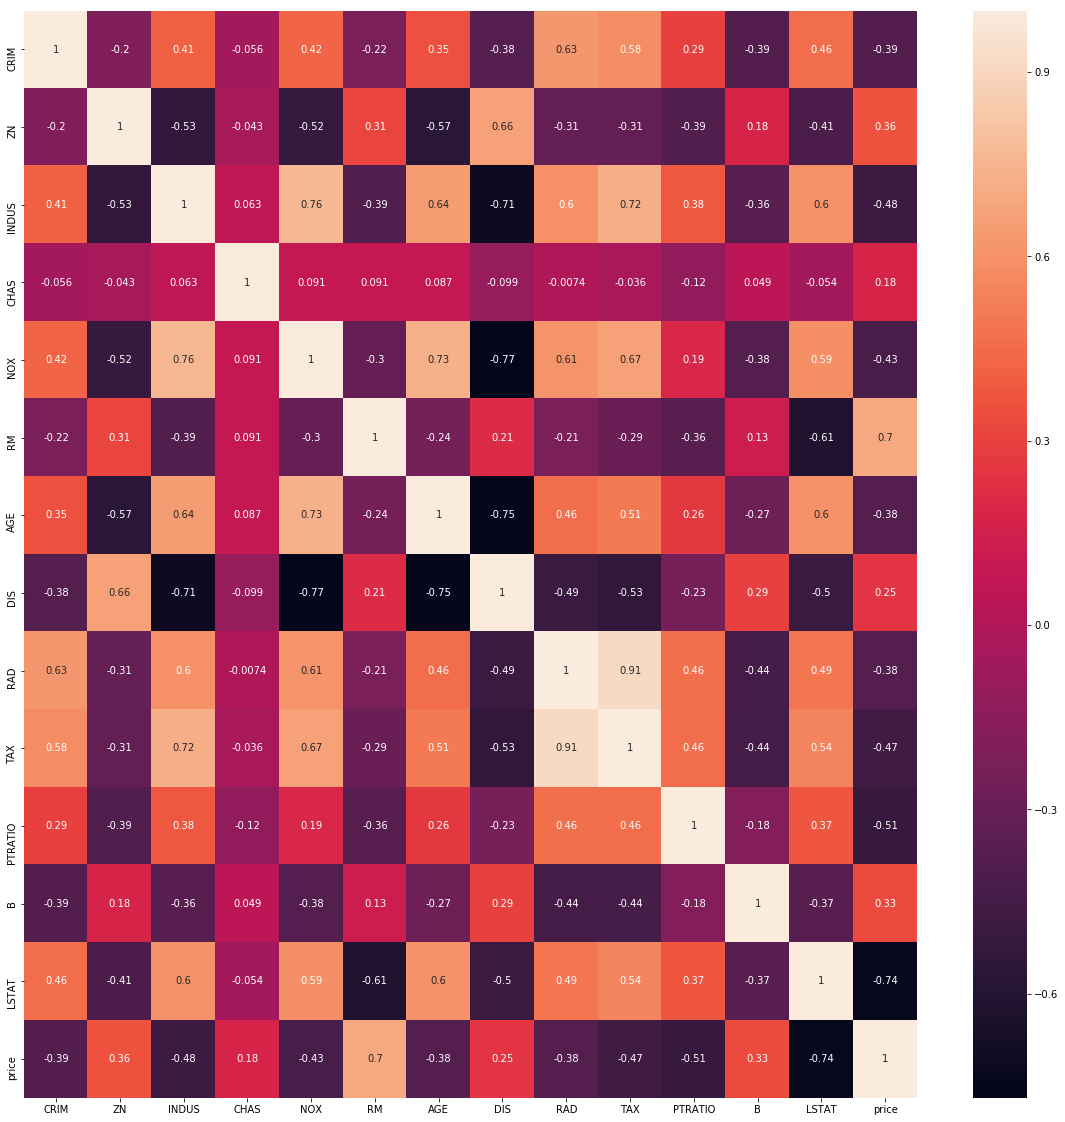

In [257]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True)

In [258]:
# Splitting target variable and independent variables 

x = df.drop(['price'],axis = 1)
y = df['price']

In [259]:
# # Splitting into training and test data 

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 4)

## Linear regression 

In [260]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training the model 
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
lr.intercept_ # the intercept value 

36.357041376595205

In [262]:
# Lets convert the coefficient values to a df 
coeff = pd.DataFrame([xtrain.columns, lr.coef_]).T
coeff = coeff.rename(columns = {0:'feature',1:'coeff'})

In [263]:
coeff

,feature,coeff
0,CRIM,-0.12257
1,ZN,0.0556777
2,INDUS,-0.00883428
3,CHAS,4.69345
4,NOX,-14.4358
5,RM,3.28008
6,AGE,-0.00344778
7,DIS,-1.55214
8,RAD,0.32625
9,TAX,-0.0140666


## Model evaluation 

In [264]:
pred = lr.predict(xtrain)

In [265]:
metrics.r2_score(ytrain,pred)

# r2 score is used to measure the linear relationship between the x and y. 
# it is the proportion of the variance in the dependent variable that is predictable from the independent variable. 

0.7465991966746854

In [266]:
print('Adjusted r2',1 - (1 - metrics.r2_score(ytrain,pred)) * (len(ytrain) - 1)/(len(ytrain) - xtrain.shape[1] - 1))

# Adjusted r2 compares the power of the reg model that contain diff number of predictor variables

Adjusted r2 0.736910342429894


In [267]:
metrics.mean_absolute_error(ytrain,pred)

# MAE : mean abs error is the mean of the errors. Its measure difference between the actual and predicted values of y(target)

3.08986109497113

In [268]:
metrics.mean_squared_error(ytrain,pred)

# MSE: mean squared error. Instead of using abs value like mae it squares the value 

19.07368870346903

In [269]:
np.sqrt(metrics.mean_squared_error(ytrain,pred))
# RSME: the square root of MSE. 

4.367343437774162

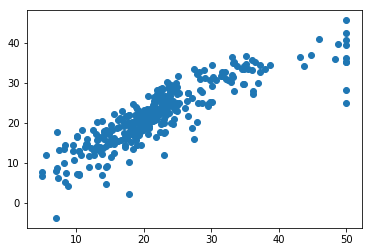

In [270]:
# Lets visualise the predicted prices 
plt.scatter(ytrain,pred)

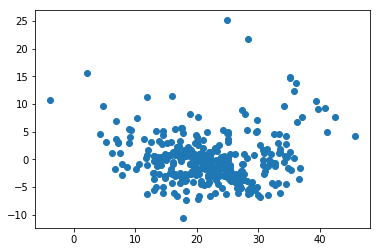

In [271]:
# checking the residuals 
plt.scatter(pred, ytrain - pred )

In [272]:
# theyre distributed around zero. Linearity condition is satisfied. 

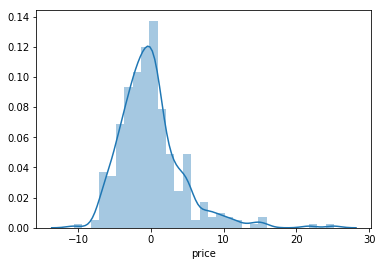

In [273]:
# Checking for normality of the data

sns.distplot(ytrain-pred)

# we can see its normally distributed. Normality assumption is satisfied.

## For test data: 

In [274]:
ytest_pred = lr.predict(xtest)

In [275]:
a =metrics.r2_score(ytest,ytest_pred)

# r2 score is used to measure the linear relationship between the x and y. 
# it is the proportion of the variance in the dependent variable that is predictable from the independent variable. 

print('Adjusted r2',1 - (1 - metrics.r2_score(ytest,ytest_pred)) * (len(ytest) - 1)/(len(ytest) - xtest.shape[1] - 1))

# Adjusted r2 compares the power of the reg model that contain diff number of predictor variables

print(metrics.mean_absolute_error(ytest,ytest_pred))

# MAE : mean abs error is the mean of the errors. Its measure difference between the actual and predicted values of y(target)

print(metrics.mean_squared_error(ytest,ytest_pred))

# MSE: mean squared error. Instead of using abs value like mae it squares the value 

print(np.sqrt(metrics.mean_squared_error(ytest,ytest_pred)))
# RSME: the square root of MSE. 

Adjusted r2 0.6850685326005713
3.8590055923707407
30.053993307124127
5.482152251362974


## Lets try deploying Random forest regressor

In [276]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

reg.fit(xtrain,ytrain)

C:\Users\akilm\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [277]:
reg_pred = reg.predict(xtrain)

In [278]:
metrics.r2_score(ytrain,reg_pred)*100

97.3011442293793

In [279]:
metrics.mean_absolute_error(ytrain,reg_pred)

0.91545197740113

In [280]:
metrics.mean_squared_error(ytrain,reg_pred)

2.031451129943503

In [281]:
np.sqrt(metrics.mean_squared_error(ytrain,reg_pred))

1.4252898406792576

In [282]:
print('Adjusted r2',1 - (1 - metrics.r2_score(ytrain,reg_pred)) * (len(ytrain) - 1)/(len(ytrain) - xtest.shape[1] - 1))


Adjusted r2 0.9719795268520851


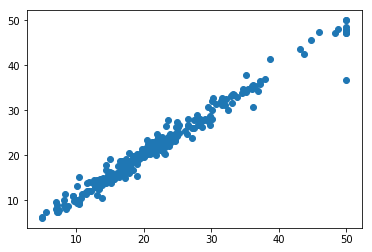

In [283]:
# Lets visualise the predicted prices 
plt.scatter(ytrain,reg_pred)

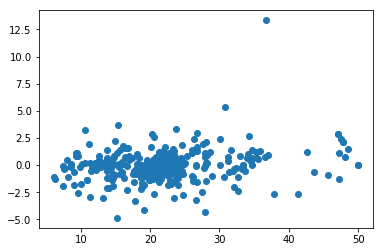

In [284]:
# checking the residuals 
plt.scatter(reg_pred, ytrain - reg_pred )

In [285]:
# theyre distributed around zero. Linearity condition is satisfied. 

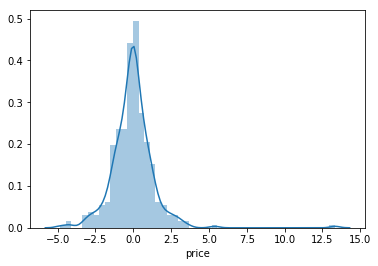

In [286]:
# Checking for normality of the data

sns.distplot(ytrain-reg_pred)

# we can see its normally distributed. Normality assumption is satisfied.

In [287]:
reg_pred = reg.predict(xtest)

In [288]:
b=metrics.r2_score(ytest,reg_pred)

# r2 score is used to measure the linear relationship between the x and y. 
# it is the proportion of the variance in the dependent variable that is predictable from the independent variable. 

print('Adjusted r2',1 - (1 - metrics.r2_score(ytest,reg_pred)) * (len(ytest) - 1)/(len(ytest) - xtest.shape[1] - 1))

# Adjusted r2 compares the power of the reg model that contain diff number of predictor variables

print(metrics.mean_absolute_error(ytest,reg_pred))

# MAE : mean abs error is the mean of the errors. Its measure difference between the actual and predicted values of y(target)

print(metrics.mean_squared_error(ytest,reg_pred))

# MSE: mean squared error. Instead of using abs value like mae it squares the value 

print(np.sqrt(metrics.mean_squared_error(ytest,reg_pred)))
# RSME: the square root of MSE. 

Adjusted r2 0.8332098970016684
2.566447368421052
15.916823684210526
3.989589412986069


In [289]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R-squared Score': [a*100, b*100,]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,84.756931
0,Linear Regression,71.218184


### As we can see our Random Forest Regressor model provides better results with 84% R-squared value.  